In [19]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, hstack, join
import fitsio
# from astropy.io import fits

import postage

# import importlib
# importlib.reload(postage)

<module 'postage' from '/global/u2/r/rongpu/notebooks/imaging_mc/psf_and_nea/postage.py'>

In [2]:
params = {'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large',
          'figure.facecolor': 'w'}
plt.rcParams.update(params)

In [3]:
cat = Table(fitsio.read('/global/cfs/cdirs/desi/users/rongpu/dr10dev/misc/survey-ccds-dr10-v4-psfex-fwhm.fits'))
print(len(cat))
dr9 = Table(fitsio.read('/global/cfs/cdirs/cosmo/data/legacysurvey/dr9/survey-ccds-decam-dr9.fits.gz', columns=['expnum', 'ccdname', 'ccd_cuts', 'filter']))
print(len(dr9))

cat['ccd_id_str'] = np.char.add(np.array(cat['expnum']).astype(str), cat['ccdname'])
dr9['ccd_id_str'] = np.char.add(np.array(dr9['expnum']).astype(str), dr9['ccdname'])

15523579
6388340


In [4]:
mask = dr9['ccd_cuts']==0
dr9 = dr9[mask]
print(len(dr9))

4891222


In [5]:
cat = join(cat, dr9[['ccd_id_str', 'filter']], keys='ccd_id_str', join_type='inner')
print(len(cat))

4891222


In [6]:
cat[:3]

expnum,ccdname,psf_fwhm,median_psf_fwhm,moffat_alpha,moffat_beta,failure,ccd_id_str,filter
int64,str3,float64,float64,float64,float64,bool,str24,str1
229250,N1,5.28437805,5.26006222,0.8404071893208582,2.5026822582832597,False,229250N1,g
229250,N10,5.24672985,5.26006222,0.7968941904839795,2.4290627063723,False,229250N10,g
229250,N11,5.30775452,5.26006222,0.8309753770395093,2.464157437565079,False,229250N11,g


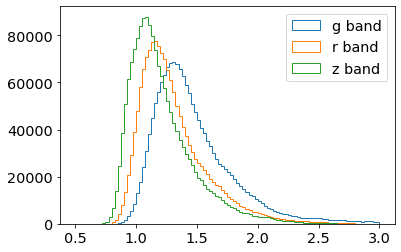

In [7]:
for band in ['g', 'r', 'z']:
    mask = cat['filter']==band
    plt.hist(cat['psf_fwhm'][mask]*0.262, 100, histtype='step', label=band+' band', range=(0.5, 3))
plt.legend()
plt.show()

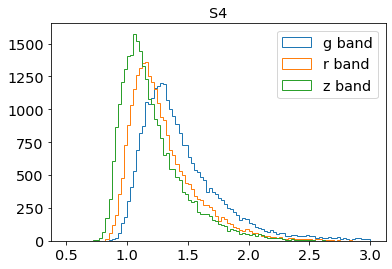

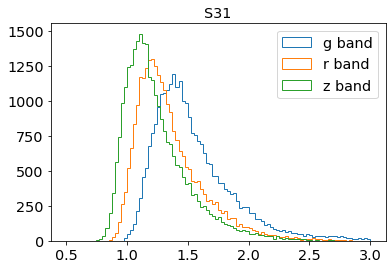

In [8]:
for band in ['g', 'r', 'z']:
    mask = cat['filter']==band
    mask &= cat['ccdname']=='S4'
    plt.hist(cat['psf_fwhm'][mask]*0.262, 100, histtype='step', label=band+' band', range=(0.5, 3))
plt.title('S4')
plt.legend()
plt.show()

for band in ['g', 'r', 'z']:
    mask = cat['filter']==band
    mask &= cat['ccdname']=='S31'
    plt.hist(cat['psf_fwhm'][mask]*0.262, 100, histtype='step', label=band+' band', range=(0.5, 3))
plt.title('S31')
plt.legend()
plt.show()

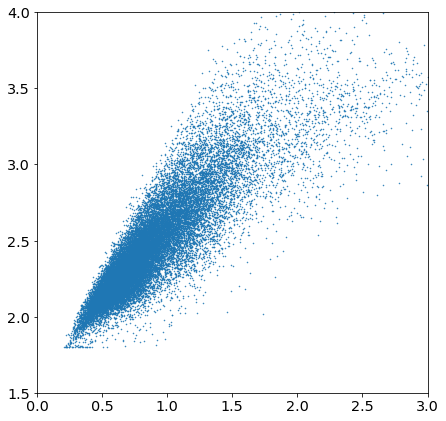

In [9]:
band = 'g'
mask = cat['filter']==band
mask &= cat['ccdname']=='S4'

plt.figure(figsize=(7, 7))
plt.plot(cat['moffat_alpha'][mask], cat['moffat_beta'][mask], '.', ms=1)
plt.axis([0, 3, 1.5, 4])
plt.show()

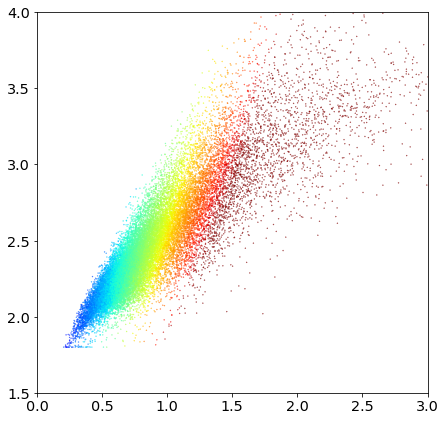

In [10]:
band = 'g'
mask = cat['filter']==band
mask &= cat['ccdname']=='S4'

plt.figure(figsize=(7, 7))
plt.scatter(cat['moffat_alpha'][mask], cat['moffat_beta'][mask], c=cat['psf_fwhm'][mask]*0.262, s=0.1, cmap='jet',
            vmin=0.7, vmax=2.)
plt.axis([0, 3, 1.5, 4])
plt.show()

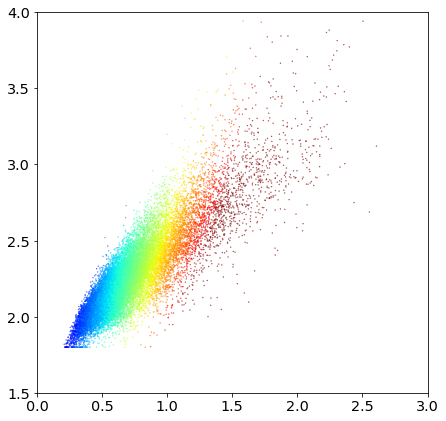

In [11]:
band = 'r'
mask = cat['filter']==band
mask &= cat['ccdname']=='S4'

plt.figure(figsize=(7, 7))
plt.scatter(cat['moffat_alpha'][mask], cat['moffat_beta'][mask], c=cat['psf_fwhm'][mask]*0.262, s=0.1, cmap='jet',
            vmin=0.7, vmax=2.)
plt.axis([0, 3, 1.5, 4])
plt.show()

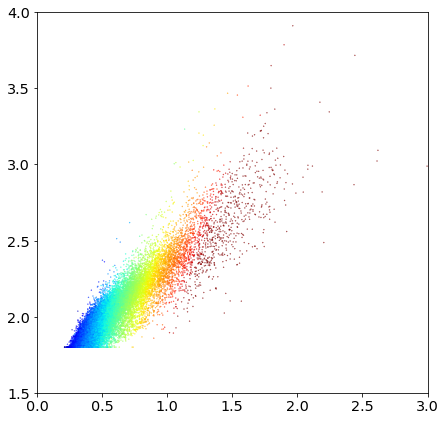

In [12]:
band = 'z'
mask = cat['filter']==band
mask &= cat['ccdname']=='S4'

plt.figure(figsize=(7, 7))
plt.scatter(cat['moffat_alpha'][mask], cat['moffat_beta'][mask], c=cat['psf_fwhm'][mask]*0.262, s=0.1, cmap='jet',
            vmin=0.7, vmax=2.)
plt.axis([0, 3, 1.5, 4])
plt.show()

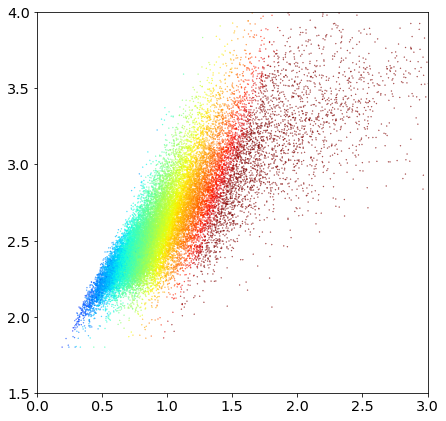

In [13]:
band = 'g'
mask = cat['filter']==band
mask &= cat['ccdname']=='S28'

plt.figure(figsize=(7, 7))
plt.scatter(cat['moffat_alpha'][mask], cat['moffat_beta'][mask], c=cat['psf_fwhm'][mask]*0.262, s=0.1, cmap='jet',
            vmin=0.7, vmax=2.)
plt.axis([0, 3, 1.5, 4])
plt.show()

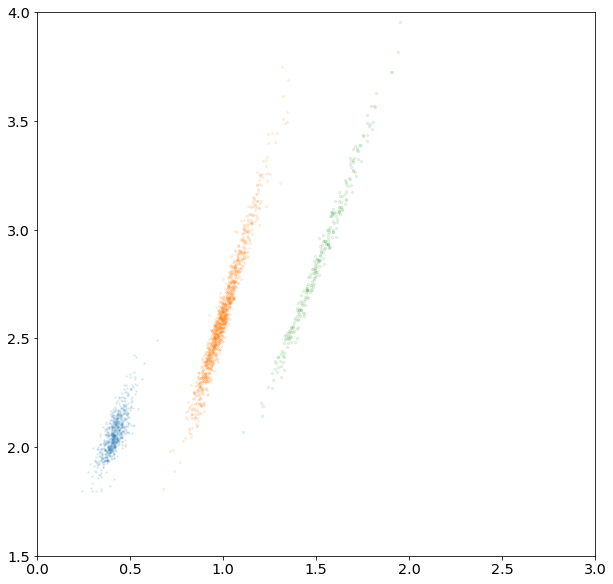

In [14]:
band = 'g'
mask = cat['filter']==band
mask &= cat['ccdname']=='S4'
plt.figure(figsize=(10, 10))
mask1 = mask & (cat['psf_fwhm']*0.262>1.0) & (cat['psf_fwhm']*0.262<1.05)
plt.plot(cat['moffat_alpha'][mask1], cat['moffat_beta'][mask1], '.', ms=3, alpha=0.1)
mask1 = mask & (cat['psf_fwhm']*0.262>1.5) & (cat['psf_fwhm']*0.262<1.55)
plt.plot(cat['moffat_alpha'][mask1], cat['moffat_beta'][mask1], '.', ms=4, alpha=0.1)
mask1 = mask & (cat['psf_fwhm']*0.262>2.0) & (cat['psf_fwhm']*0.262<2.05)
plt.plot(cat['moffat_alpha'][mask1], cat['moffat_beta'][mask1], '.', ms=5, alpha=0.1)
plt.axis([0, 3, 1.5, 4])
plt.show()

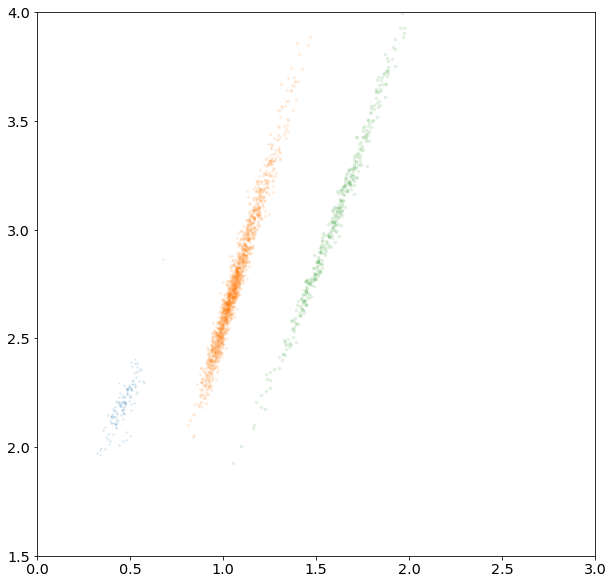

In [15]:
band = 'g'
mask = cat['filter']==band
mask &= cat['ccdname']=='S31'
plt.figure(figsize=(10, 10))
mask1 = mask & (cat['psf_fwhm']*0.262>1.0) & (cat['psf_fwhm']*0.262<1.05)
plt.plot(cat['moffat_alpha'][mask1], cat['moffat_beta'][mask1], '.', ms=3, alpha=0.1)
mask1 = mask & (cat['psf_fwhm']*0.262>1.5) & (cat['psf_fwhm']*0.262<1.55)
plt.plot(cat['moffat_alpha'][mask1], cat['moffat_beta'][mask1], '.', ms=4, alpha=0.1)
mask1 = mask & (cat['psf_fwhm']*0.262>2.0) & (cat['psf_fwhm']*0.262<2.05)
plt.plot(cat['moffat_alpha'][mask1], cat['moffat_beta'][mask1], '.', ms=5, alpha=0.1)
plt.axis([0, 3, 1.5, 4])
plt.show()

------

In [16]:
ccdnamenumdict = {'S1': 25, 'S2': 26, 'S3': 27, 'S4':28,
                  'S5': 29, 'S6': 30, 'S7': 31,
                  'S8': 19, 'S9': 20, 'S10': 21, 'S11': 22, 'S12': 23,
                  'S13': 24,
                  'S14': 13, 'S15': 14, 'S16': 15, 'S17': 16, 'S18': 17,
                  'S19': 18,
                  'S20': 8, 'S21': 9, 'S22': 10, 'S23': 11, 'S24': 12,
                  'S25': 4, 'S26': 5, 'S27': 6, 'S28': 7,
                  'S29': 1, 'S30': 2, 'S31': 3,
                  'N1': 32, 'N2': 33, 'N3': 34, 'N4': 35,
                  'N5': 36, 'N6': 37, 'N7': 38,
                  'N8': 39, 'N9': 40, 'N10': 41, 'N11': 42, 'N12': 43,
                  'N13': 44,
                  'N14': 45, 'N15': 46, 'N16': 47, 'N17': 48, 'N18': 49,
                  'N19': 50,
                  'N20': 51, 'N21': 52, 'N22': 53, 'N23': 54, 'N24': 55,
                  'N25': 56, 'N26': 57, 'N27': 58, 'N28': 59,
                  'N29': 60, 'N30': 61, 'N31': 62}
ccdnamenumdict_inv = {aa: bb for bb, aa in ccdnamenumdict.items()}

ccdnum_list = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 62]

g band


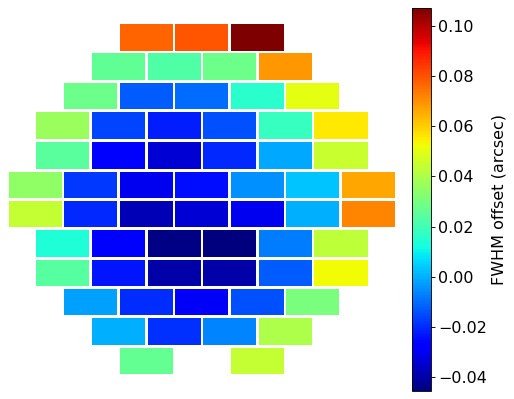

r band


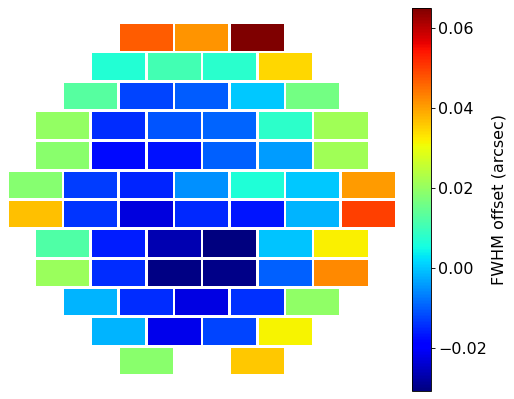

z band


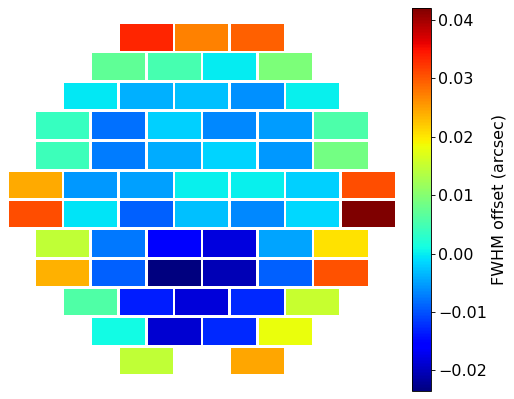

In [17]:
fwhm_dict = {}

for band in ['g', 'r', 'z']:
    print(band, 'band')
    mask = cat['filter']==band
    cat1 = cat[mask]
    cat1['psf_fwhm_offset'] = cat1['psf_fwhm'] - cat1['median_psf_fwhm']
    
    fwhm_dict[band] = []
    for ccdnum in ccdnum_list:
        ccdname = ccdnamenumdict_inv[ccdnum]
        mask = cat1['ccdname']==ccdname
        fwhm_dict[band].append(0.262*np.median(cat1['psf_fwhm_offset'][mask]))
        
    postage.decam_postage_stamp(fwhm_dict[band], binsize=70, cmap='jet')
    plt.show()

g band


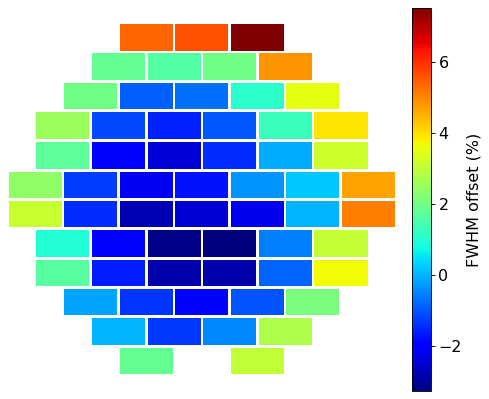

r band


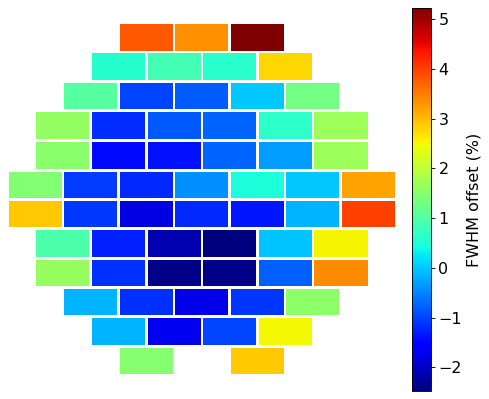

z band


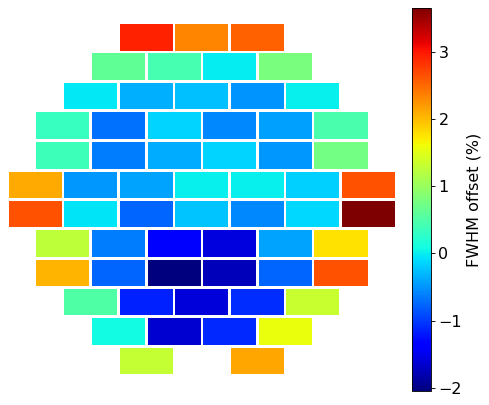

In [27]:
fwhm_dict = {}

for band in ['g', 'r', 'z']:
    print(band, 'band')
    mask = cat['filter']==band
    cat1 = cat[mask]
    cat1['psf_fwhm_offset'] = 100 * (cat1['psf_fwhm']/cat1['median_psf_fwhm']-1)
    
    fwhm_dict[band] = []
    for ccdnum in ccdnum_list:
        ccdname = ccdnamenumdict_inv[ccdnum]
        mask = cat1['ccdname']==ccdname
        fwhm_dict[band].append(np.median(cat1['psf_fwhm_offset'][mask]))
        
    postage.decam_postage_stamp(fwhm_dict[band], binsize=70, cmap='jet', cbarlabel='FWHM offset (%)')
    plt.show()

In [42]:
fwhm = cat['moffat_alpha'] * 2 * np.sqrt(2**(1/cat['moffat_beta'])-1)

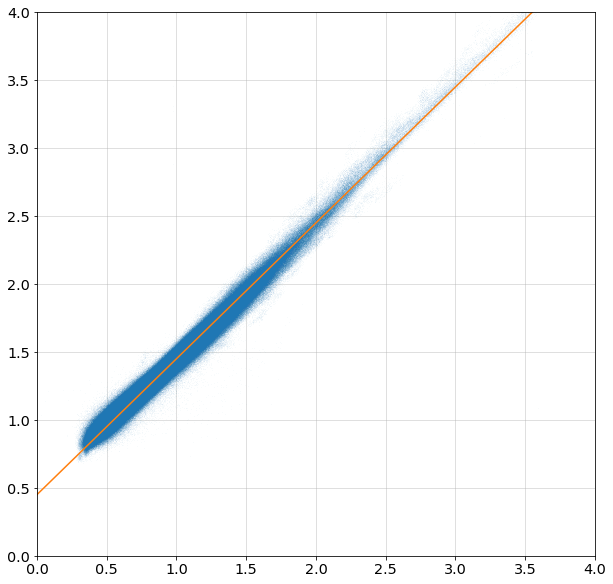

In [47]:
idx = np.random.choice(len(cat), size=len(cat)//10, replace=False)
plt.figure(figsize=(10, 10))
plt.plot(fwhm, cat['psf_fwhm']*0.262, '.', ms=0.02)
plt.plot(np.arange(100), np.arange(100)+0.45)
plt.axis([0, 4, 0, 4])
plt.grid(alpha=0.5)
plt.show()